<a href="https://colab.research.google.com/github/Cindy-eng/AI-Data-Engineer--Assignments/blob/master/10_Mt_Fuji_Shimoyama_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

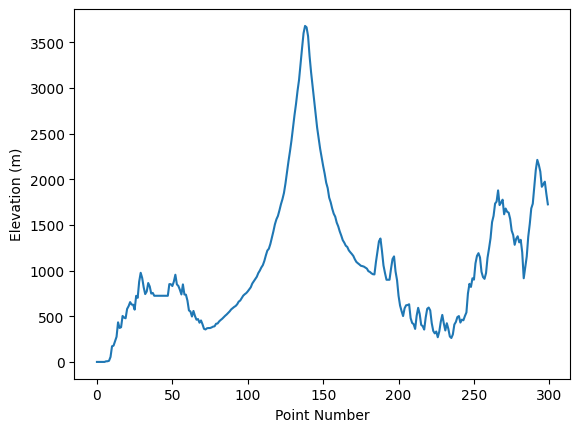

In [2]:
#Problem 1: Data Visualization
import numpy as np
import matplotlib.pyplot as plt

csv_path = "mtfuji_data.csv" #

np.set_printoptions(suppress=True) #
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)


points=fuji[:,0];
elevation=fuji[:,3]

fig, ax = plt.subplots();
ax.plot(points,elevation);
plt.xlabel("Point Number")
plt.ylabel("Elevation (m)")
plt.show();

In [11]:
#Problem 2: Create a function to calculate the slope of a certain pointf

def found_slope(fuji,points):
  if points == 0:
    return 0
  return (fuji[points, 3] - fuji[points - 1, 3]) / (fuji[points, 0] - fuji[points - 1, 0])

print('Result ',found_slope(fuji,132))



Result  122.45000000000027


In [12]:
#Problem 3: Create a function to calculate the destination point

def next_point(fuji,current_point,alph=0.2):
  slope=found_slope(fuji,current_point);
  next=current_point-alph*slope
  return next
print(next_point(fuji, 136))

102.32999999999993


In [3]:
#Problem 4: Create a function to go down the mountain

def calculate_slope(fuji, point):
    if point == 0:
        return 0
    return (fuji[point, 3] - fuji[point - 1, 3]) / (point - (point - 1))

def next_point(fuji, point, alpha=0.2):
    slope = calculate_slope(fuji, point)
    new_point = int(round(point - alpha * slope))
    #new_point = max(0, min(new_point, len(fuji) - 1))
    return new_point

def descend_mountain(fuji, start_point, alpha=0.2):
    path = [start_point]
    while True:
        next_p = next_point(fuji, path[-1], alpha)
        if next_p == path[-1]:
            break
        path.append(next_p)
    return path


path = descend_mountain(fuji, 136)
print(path)

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


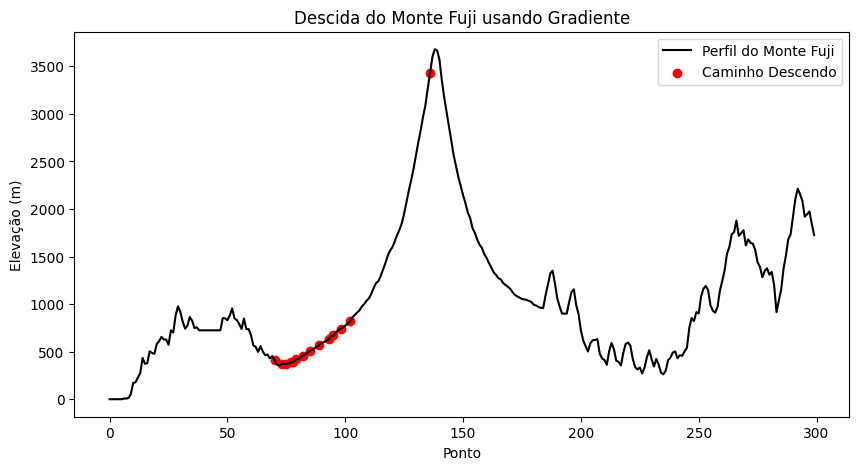

In [4]:
#【Question 5】Visualization of the descent process

plt.figure(figsize=(10, 5))
plt.plot(fuji[:, 3], label="Perfil do Monte Fuji", linestyle='-', color='black')
plt.scatter(path, fuji[path, 3], color='red', label="Caminho Descendo")
plt.xlabel("Ponto")
plt.ylabel("Elevação (m)")
plt.legend()
plt.title("Descida do Monte Fuji usando Gradiente")
plt.show()